In [15]:
import pandas as pd
import numpy as np

file_path = './Data/US_Accidents_March23.csv'

# Load the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Display the top 5 rows
print(data.head())

    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          F

In [16]:
print("Initial Data Overview:")
print(data.info())

Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64


Handlling the Missing Values

In [17]:
# Dropping columns with more than 50% missing values (if any) from the DataFrame(DF)
threshold = 0.5 * len(data)
df = data.dropna(thresh=threshold, axis=1)

In [18]:
df.shape

(7728394, 46)

In [19]:
# Imputing missing values for numerical columns with the median
numerical_cols = ['End_Lat', 'End_Lng', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 
                  'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']
for col in numerical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

In [20]:
# Imputing categorical columns with the mode
categorical_cols = ['Weather_Condition', 'Side', 'City', 'County', 'State', 'Zipcode', 'Timezone']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

Converting Time-Related Columns

In [37]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])

In [38]:
# Handle rows with invalid End_Time
df = df[df['End_Time'] > df['Start_Time']]

Engineer Features

In [42]:
# Ensure we are working with a copy of the DataFrame
df = df.copy()

# Calculate the Duration of accidents (in minutes) explicitly using .loc
df.loc[:, 'Duration'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 60


In [44]:
# Extract hour from Start_Time
df['Hour'] = df['Start_Time'].dt.hour

# Categorize time of day acc to the hour
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Time_of_Day'] = df['Hour'].apply(categorize_time)


In [45]:
# Simplify Weather_Condition
def categorize_weather(condition):
    if 'Rain' in condition or 'Thunderstorm' in condition:
        return 'Rainy'
    elif 'Snow' in condition or 'Ice' in condition:
        return 'Snowy'
    elif 'Clear' in condition or 'Fair' in condition:
        return 'Clear'
    elif 'Cloud' in condition or 'Overcast' in condition or 'Fog' in condition:
        return 'Cloudy'
    else:
        return 'Other'

df['Weather_Bin'] = df['Weather_Condition'].apply(categorize_weather)

In [46]:
# Display cleaned and processed data overview
print("Cleaned Data Overview:")
print(df.info())

Cleaned Data Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 6985228 entries, 0 to 7728393
Data columns (total 50 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               datetime64[ns]
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   End_Lat                float64       
 8   End_Lng                float64       
 9   Distance(mi)           float64       
 10  Description            object        
 11  Street                 object        
 12  City                   object        
 13  County                 object        
 14  State                  object        
 15  Zipcode                object        
 16  Country                object        
 17  Timezone               object        
 18  Airp

In [48]:
cleaned_file_path = "Data/Cleaned_US_Accidents_Dataset.csv"
df.to_csv(cleaned_file_path, index=False)

Visualization and Exploratory Data Analysis (EDA)

In [51]:
import matplotlib.pyplot as plt


In [52]:
# Analyze the distribution of accident severity
severity_counts = df['Severity'].value_counts().sort_index()


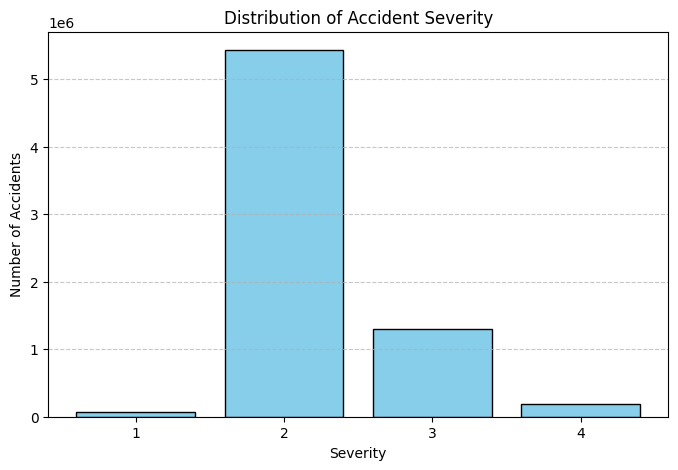

In [53]:
# Plot the distribution of accident severity
plt.figure(figsize=(8, 5))
plt.bar(severity_counts.index, severity_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribution of Accident Severity')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.xticks(severity_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

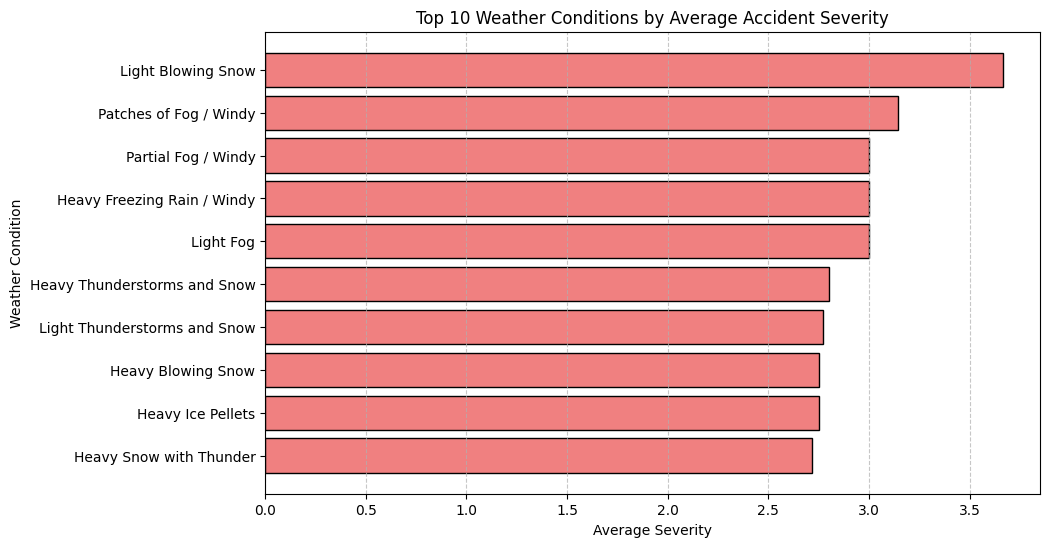

In [54]:
# Investigate correlations between severity and weather
weather_severity = df.groupby('Weather_Condition')['Severity'].mean().sort_values()

plt.figure(figsize=(10, 6))
plt.barh(weather_severity.index[-10:], weather_severity.values[-10:], color='lightcoral', edgecolor='black')
plt.title('Top 10 Weather Conditions by Average Accident Severity')
plt.xlabel('Average Severity')
plt.ylabel('Weather Condition')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

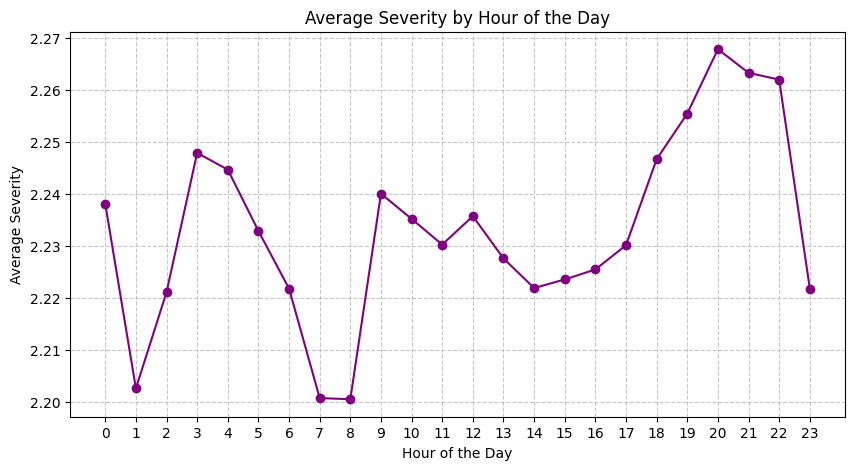

In [55]:
# Analyze severity by time of day
df['Hour'] = df['Start_Time'].dt.hour
hourly_severity = df.groupby('Hour')['Severity'].mean()

plt.figure(figsize=(10, 5))
plt.plot(hourly_severity.index, hourly_severity.values, marker='o', color='purple')
plt.title('Average Severity by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Severity')
plt.xticks(range(0, 24))
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

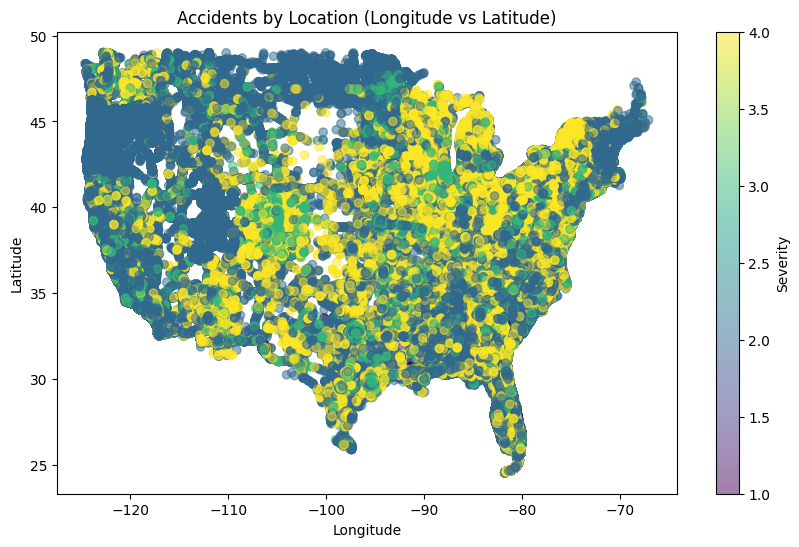

In [56]:
# Investigate correlations between severity and location (latitude and longitude)
plt.figure(figsize=(10, 6))
plt.scatter(df['Start_Lng'], df['Start_Lat'], c=df['Severity'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Severity')
plt.title('Accidents by Location (Longitude vs Latitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Training ML models to predict the severity of accidents

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.impute import SimpleImputer

In [58]:
# Sample a smaller subset of data (10% of the original data)
sample_size = 0.01
df_sample, _ = train_test_split(df, test_size=(1 - sample_size), stratify=df['Severity'], random_state=42)


In [59]:
# Separate features and target
X_sample = df_sample.drop(columns=['Severity'])
y_sample = df_sample['Severity']

In [60]:
# Split the sample into train and test sets
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(
    X_sample, y_sample, test_size=0.25, random_state=42, stratify=y_sample
)

In [61]:
# Preprocessing
numerical_features = ['Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']
categorical_features = ['Weather_Condition']

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

In [62]:
# Define models to compare
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42)
}

In [64]:
# Evaluate each model
best_model = None
best_score = 0

for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Train the model
    pipeline.fit(X_train_sample, y_train_sample)
    
    # Evaluate the model
    y_pred_sample = pipeline.predict(X_test_sample)
    if hasattr(pipeline['classifier'], 'predict_proba'):
        y_proba_sample = pipeline.predict_proba(X_test_sample)
        roc_auc = roc_auc_score(y_test_sample, y_proba_sample, multi_class='ovr')
    else:
        y_proba_sample = None
        roc_auc = None  # Skip ROC-AUC for models without predict_proba
    
    accuracy = accuracy_score(y_test_sample, y_pred_sample)
    f1 = f1_score(y_test_sample, y_pred_sample, average='weighted')
    
    print(f"{model_name} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}" +
          (f", ROC-AUC: {roc_auc:.4f}" if roc_auc else ""))
    print("\nClassification Report:\n", classification_report(y_test_sample, y_pred_sample))
    
    # Update the best model
    if f1 > best_score:
        best_model = pipeline
        best_score = f1

print("\nBest model based on F1 score:", best_model['classifier'])


Training Random Forest...
Random Forest - Accuracy: 0.7629, F1 Score: 0.7014, ROC-AUC: 0.7372

Classification Report:
               precision    recall  f1-score   support

           1       0.27      0.02      0.03       168
           2       0.79      0.96      0.86     13585
           3       0.35      0.10      0.15      3248
           4       0.14      0.01      0.02       462

    accuracy                           0.76     17463
   macro avg       0.39      0.27      0.27     17463
weighted avg       0.68      0.76      0.70     17463

Training Gradient Boosting...
Gradient Boosting - Accuracy: 0.7784, F1 Score: 0.6854, ROC-AUC: 0.7790

Classification Report:
               precision    recall  f1-score   support

           1       0.25      0.01      0.01       168
           2       0.78      1.00      0.88     13585
           3       0.47      0.01      0.02      3248
           4       0.40      0.01      0.02       462

    accuracy                           0.78    

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Support Vector Machine - Accuracy: 0.7785, F1 Score: 0.6834, ROC-AUC: 0.6378

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       168
           2       0.78      1.00      0.88     13585
           3       0.51      0.01      0.01      3248
           4       0.00      0.00      0.00       462

    accuracy                           0.78     17463
   macro avg       0.32      0.25      0.22     17463
weighted avg       0.70      0.78      0.68     17463


Best model based on F1 score: RandomForestClassifier(random_state=42)


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif